In [7]:
import cv2
import matplotlib.pyplot as plt
import os
cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
assert os.path.exists(cascade_path), "Cascade file not found!"

In [8]:
!wget -O /content/face.jpg \
  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
img_path = "/content/face.jpg"

--2025-08-31 06:38:56--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘/content/face.jpg’

/content/face.jpg   100%[===================>]  89.66K  --.-KB/s    in 0.02s   

2025-08-31 06:38:57 (3.73 MB/s) - ‘/content/face.jpg’ saved [91814/91814]



In [9]:
# 1) Load the pre-trained Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cascade_path)

# 2) Read and preprocess the input image
img = cv2.imread(img_path)                         # BGR
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)       # Haar cascades need grayscale

In [10]:
# 3) Detect faces (tweak params as needed)
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,     # image pyramid step (smaller -> more accurate, slower)
    minNeighbors=5,      # higher -> fewer false positives
    minSize=(30, 30)     # ignore tiny detections
)
print(f"Faces detected: {len(faces)}")

Faces detected: 1


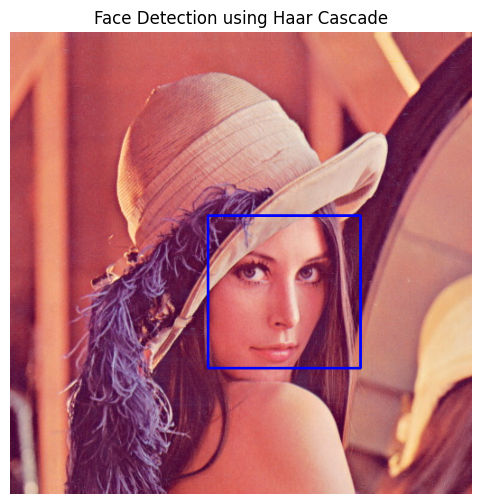

In [11]:
# 4) Draw bounding boxes
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# 5) Convert to RGB for matplotlib and show
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Face Detection using Haar Cascade")
plt.show()